# **Water Velocity Dataset for depths: 4, 40, and 150m**

In this colab notebook we work with the ocean velocity depths dataset found on https://developers.google.com/earth-engine/datasets/catalog/HYCOM_sea_water_velocity

To try to seperate the work and creating all these plots as efficent ever notebook focuses on 3 different depths. This notebook focues of 40, 40, and 150m. The dataset contains both northward and eastward velocity. Here we create plots of the mean velocity throughout the months and years in our ROI. We also have created a gif that allows us to better understand the velocity change and how it compares to other features that are looked at. The method done for this is the similar to all the other ways graphs and gifs were generated.

# **Necessary Downloads**

In [ ]:
pip install geemap

     |████████████████████████████████| 450kB 11.0MB/s 
     |████████████████████████████████| 102kB 5.7MB/s 
     |████████████████████████████████| 1.2MB 31.2MB/s 
     |████████████████████████████████| 225kB 64.6MB/s 
     |████████████████████████████████| 5.1MB 64.2MB/s 
     |████████████████████████████████| 143kB 73.8MB/s 
     |████████████████████████████████| 1.6MB 48.3MB/s 
     |████████████████████████████████| 102kB 7.1MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 1.3MB 51.7MB/s 
     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 122kB 61.1MB/s 
     |████████████████████████████████| 378kB 63.1MB/s 
     |████████████████████████████████| 552kB 51.8MB/s 
     |████████████████████████████████| 122kB 52.2MB/s 
     |████████████████████████████████| 430kB 63.6MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-non

In [ ]:
import tensorflow as tf

# check that a GPU is enabled
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
!earthengine authenticate

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=dA8fWmP7RhloJuuCgcSAl2TnrUHc4xivY4LcNPwn0qY&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g7287egqFbYUa0I5UVkAj8H-9jeCM2KtEzEoogluIaBrcsUthawPU0

Successfully saved authorization token.


In [ ]:
!pip install earthengine-api
!pip install folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import ee
import geemap
ee.Initialize()

import matplotlib.pyplot as plt
import numpy as np

# **Getting the Geometry**

In [ ]:
#from class
import json
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

jsonFile = '/content/drive/MyDrive/ML/Final_Project/map.geojson' #change if you want to run

with open(jsonFile, 'r') as file:
  jsonLoad = json.load(file)

geometry = jsonLoad['features'][0]['geometry']

In [ ]:
geometry

{'coordinates': [[[-75.146484375, 32.32427558887655],
   [-9.31640625, 32.32427558887655],
   [-9.31640625, 46.49839225859763],
   [-75.146484375, 46.49839225859763],
   [-75.146484375, 32.32427558887655]]],
 'type': 'Polygon'}

# **Depth 4m**

In [ ]:
from datetime import datetime, timedelta

In [ ]:
years = [2014,2015,2016]
days_aggregate = 30
day_step = 7

In [ ]:
sd_2014_4 = datetime(years[0], month=1, day=1)
ed_2014_4 = sd_2014_4 + timedelta(days=days_aggregate)

sd_2015_4 = datetime(years[1], month=1, day=1)
ed_2015_4 = sd_2015_4 + timedelta(days=days_aggregate)

sd_2016_4 = datetime(years[2], month=1, day=1)
ed_2016_4 = sd_2016_4 + timedelta(days=days_aggregate)

In [ ]:
v4_2014 = list()
v4_2015 = list()
v4_2016 = list()

u4_2014 = list()
u4_2015 = list()
u4_2016 = list()

dates = list()

In [ ]:
aoi = ee.Geometry(geometry)
ic_v4 = ee.ImageCollection('HYCOM/sea_water_velocity').filterBounds(aoi).select('velocity_v_4')
ic_u4 = ee.ImageCollection('HYCOM/sea_water_velocity').filterBounds(aoi).select('velocity_u_4')

gif1 = ic_v4.filterDate(sd_2014_4, ed_2016_4)
gif2 = ic_u4.filterDate(sd_2014_4, ed_2016_4)

In [ ]:
sd_2014_4 = '2014-01-01'
ed_2014_4 = '2014-12-31'

sd_2015_4 = '2015-01-01'
ed_2015_4 = '2015-12-31'

sd_2016_4 = '2016-01-01'
ed_2016_4 = '2016-12-31'

In [ ]:
ic_v42014 = ic_v4.filterDate(sd_2014_4, ed_2014_4)
ic_u42014 = ic_u4.filterDate(sd_2014_4, ed_2014_4)

ic_v42015 = ic_v4.filterDate(sd_2015_4, ed_2015_4)
ic_u42015 = ic_u4.filterDate(sd_2015_4, ed_2015_4)

ic_v42016 = ic_v4.filterDate(sd_2016_4, ed_2016_4)
ic_u42016 = ic_u4.filterDate(sd_2016_4, ed_2016_4)

In [ ]:
def setProperty(image):
    dict = image.reduceRegion(ee.Reducer.mean(), geometry)
    
    return image.set(dict)

#withMean = collection.map(setProperty)

In [ ]:
mean_spatial_2014_v4 = ic_v42014.map(setProperty)
mean_spatial_2014_u4 = ic_u42014.map(setProperty)

mean_spatial_2015_v4 = ic_v42015.map(setProperty)
mean_spatial_2015_u4 = ic_u42015.map(setProperty)

mean_spatial_2016_v4 = ic_v42016.map(setProperty)
mean_spatial_2016_u4 = ic_u42016.map(setProperty)

In [ ]:
v4_2014 = mean_spatial_2014_v4.aggregate_array('velocity_v_4').getInfo()
u4_2014 = mean_spatial_2014_u4.aggregate_array('velocity_u_4').getInfo()

v4_2015 = mean_spatial_2015_v4.aggregate_array('velocity_v_4').getInfo()
u4_2015 = mean_spatial_2015_u4.aggregate_array('velocity_u_4').getInfo()

v4_2016 = mean_spatial_2016_v4.aggregate_array('velocity_v_4').getInfo()
u4_2016 = mean_spatial_2016_u4.aggregate_array('velocity_u_4').getInfo()

In [ ]:
v4_2014 = np.array(v4_2014)
v4_2014 = (v4_2014/1000) 
v4_2014 = v4_2014[:359] 

v4_2015 = np.array(v4_2015)
v4_2015 = (v4_2015/1000) 
v4_2015 = v4_2015[:359] 

v4_2016 = np.array(v4_2016)
v4_2016 = (v4_2016/1000) 
v4_2016 = v4_2016[:359] 

u4_2014 = np.array(u4_2014)
u4_2014 = (u4_2014/1000) 
u4_2014 = u4_2014[:359] 

u4_2015 = np.array(u4_2015)
u4_2015 = (u4_2015/1000) 
u4_2015 = u4_2015[:359] 

u4_2016 = np.array(u4_2016)
u4_2016 = (u4_2016/1000)
u4_2016 = u4_2016[:359] 


In [ ]:
len(u4_2016)

359

In [ ]:
array = np.array(u4_2015)
array

In [ ]:
len(u4_2014)

359

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
xlabel = []
for i in range(0, len(months)):
  for _ in range (0, 30):
    xlabel.append(months[i])

xlabel = xlabel[:359]

In [ ]:
len(xlabel)

359

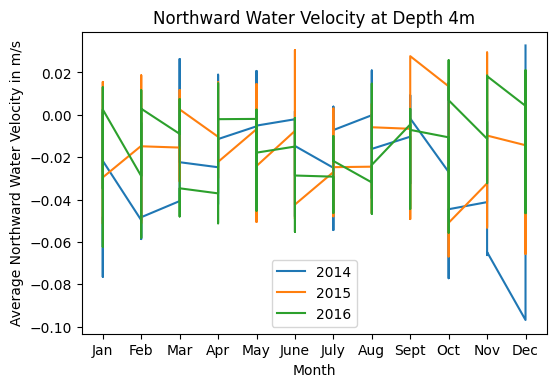

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, v4_2014)
plt.plot(xlabel, v4_2015)
plt.plot(xlabel, v4_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Northward Water Velocity in m/s')
plt.title('Northward Water Velocity at Depth 4m')
plt.show()

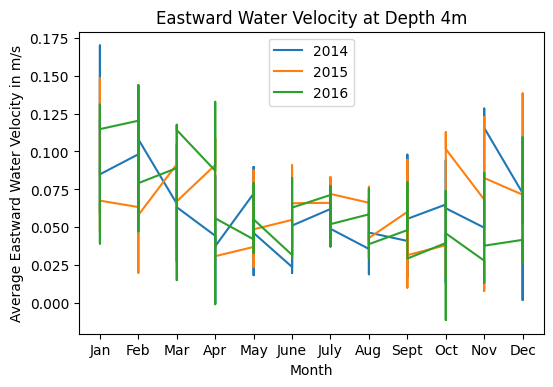

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, u4_2014)
plt.plot(xlabel, u4_2015)
plt.plot(xlabel, u4_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Eastward Water Velocity in m/s')
plt.title('Eastward Water Velocity at Depth 4m')
plt.show()

# **Depth 40m**

In [ ]:
aoi = ee.Geometry(geometry)
ic_v40 = ee.ImageCollection('HYCOM/sea_water_velocity').filterBounds(aoi).select('velocity_v_40')
ic_u40 = ee.ImageCollection('HYCOM/sea_water_velocity').filterBounds(aoi).select('velocity_u_40')

In [ ]:
ic_v2014_40 = ic_v40.filterDate(sd_2014_4, ed_2014_4)
ic_u2014_40 = ic_u40.filterDate(sd_2014_4, ed_2014_4)

ic_v2015_40 = ic_v40.filterDate(sd_2015_4, ed_2015_4)
ic_u2015_40 = ic_u40.filterDate(sd_2015_4, ed_2015_4)

ic_v2016_40 = ic_v40.filterDate(sd_2016_4, ed_2016_4)
ic_u2016_40 = ic_u40.filterDate(sd_2016_4, ed_2016_4)

In [ ]:
mean_spatial_2014_v40 = ic_v2014_40.map(setProperty)
mean_spatial_2014_u40 = ic_u2014_40.map(setProperty)

mean_spatial_2015_v40 = ic_v2015_40.map(setProperty)
mean_spatial_2015_u40 = ic_u2015_40.map(setProperty)

mean_spatial_2016_v40 = ic_v2016_40.map(setProperty)
mean_spatial_2016_u40 = ic_u2016_40.map(setProperty)

In [ ]:
v40_2014 = mean_spatial_2014_v40.aggregate_array('velocity_v_40').getInfo()
u40_2014 = mean_spatial_2014_u40.aggregate_array('velocity_u_40').getInfo()

v40_2015 = mean_spatial_2015_v40.aggregate_array('velocity_v_40').getInfo()
u40_2015 = mean_spatial_2015_u40.aggregate_array('velocity_u_40').getInfo()

v40_2016 = mean_spatial_2016_v40.aggregate_array('velocity_v_40').getInfo()
u40_2016 = mean_spatial_2016_u40.aggregate_array('velocity_u_40').getInfo()

In [ ]:
v40_2014 = np.array(v40_2014)
v40_2014 = (v40_2014/1000)
v40_2014 = v40_2014[:359] 

v40_2015 = np.array(v40_2015)
v40_2015 = (v40_2015/1000) 
v40_2015 = v40_2015[:359] 

v40_2016 = np.array(v40_2016)
v40_2016 = (v40_2016/1000)
v40_2016 = v40_2016[:359] 

u40_2014 = np.array(u40_2014)
u40_2014 = (u40_2014/1000)
u40_2014 = u40_2014[:359] 

u40_2015 = np.array(u40_2015)
u40_2015 = (u40_2015/1000)
u40_2015 = u40_2015[:359] 

u40_2016 = np.array(u40_2016)
u40_2016 = (u40_2016/1000)
u40_2016 = u40_2016[:359] 

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
xlabel = []
for i in range(0, len(months)):
  for _ in range (0, 30):
    xlabel.append(months[i])

xlabel = xlabel[:359]

In [ ]:
len(xlabel)

359

In [ ]:
len(u40_2014)

359

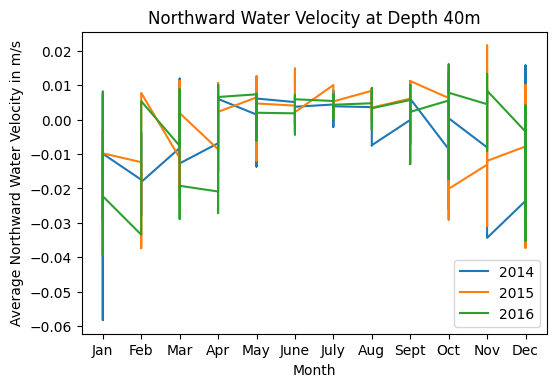

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, v40_2014)
plt.plot(xlabel, v40_2015)
plt.plot(xlabel, v40_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Northward Water Velocity in m/s')
plt.title('Northward Water Velocity at Depth 40m')
plt.show()

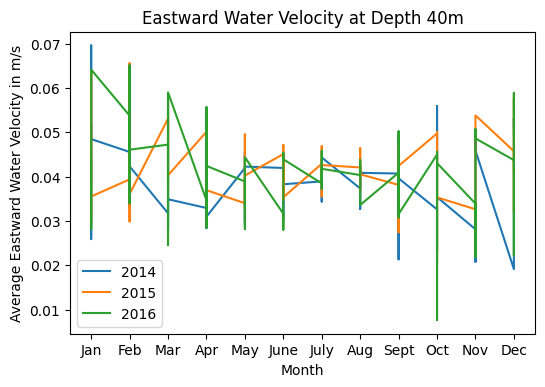

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, u40_2014)
plt.plot(xlabel, u40_2015)
plt.plot(xlabel, u40_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Eastward Water Velocity in m/s')
plt.title('Eastward Water Velocity at Depth 40m')
plt.show()

# **Depth 150m**

In [ ]:
aoi = ee.Geometry(geometry)
ic_v150 = ee.ImageCollection('HYCOM/sea_water_velocity').filterBounds(aoi).select('velocity_v_150')
ic_u150 = ee.ImageCollection('HYCOM/sea_water_velocity').filterBounds(aoi).select('velocity_u_150')

In [ ]:
ic_v2014_150 = ic_v150.filterDate(sd_2014_4, ed_2014_4)
ic_u2014_150 = ic_u150.filterDate(sd_2014_4, ed_2014_4)

ic_v2015_150 = ic_v150.filterDate(sd_2015_4, ed_2015_4)
ic_u2015_150 = ic_u150.filterDate(sd_2015_4, ed_2015_4)

ic_v2016_150 = ic_v150.filterDate(sd_2016_4, ed_2016_4)
ic_u2016_150 = ic_u150.filterDate(sd_2016_4, ed_2016_4)

In [ ]:
ic_v2014_150.size().getInfo()

363

In [ ]:
mean_spatial_2014_v150 = ic_v2014_150.map(setProperty)
mean_spatial_2014_u150 = ic_u2014_150.map(setProperty)

mean_spatial_2015_v150 = ic_v2015_150.map(setProperty)
mean_spatial_2015_u150 = ic_u2015_150.map(setProperty)

mean_spatial_2016_v150 = ic_v2016_150.map(setProperty)
mean_spatial_2016_u150 = ic_u2016_150.map(setProperty)

In [ ]:
v150_2014 = mean_spatial_2014_v150.aggregate_array('velocity_v_150').getInfo()
u150_2014 = mean_spatial_2014_u150.aggregate_array('velocity_u_150').getInfo()

v150_2015 = mean_spatial_2015_v150.aggregate_array('velocity_v_150').getInfo()
u150_2015 = mean_spatial_2015_u150.aggregate_array('velocity_u_150').getInfo()

v150_2016 = mean_spatial_2016_v150.aggregate_array('velocity_v_150').getInfo()
u150_2016 = mean_spatial_2016_u150.aggregate_array('velocity_u_150').getInfo()

In [ ]:
v150_2014 = np.array(v150_2014)
v150_2014 = (v150_2014/1000)
v150_2014 = v150_2014[:359] 

v150_2015 = np.array(v150_2015)
v150_2015 = (v150_2015/1000)
v150_2015 = v150_2015[:359] 

v150_2016 = np.array(v150_2016)
v150_2016 = (v150_2016/1000) 
v150_2016 = v150_2016[:359] 

u150_2014 = np.array(u150_2014)
u150_2014 = (u150_2014/1000) 
u150_2014 = u150_2014[:359] 

u150_2015 = np.array(u150_2015)
u150_2015 = (u150_2015/1000) 
u150_2015 = u150_2015[:359] 

u150_2016 = np.array(u150_2016)
u150_2016 = (u150_2016/1000) 
u150_2016 = u150_2016[:359] 

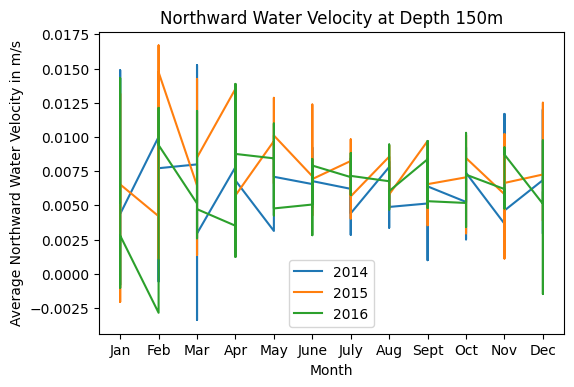

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, v150_2014)
plt.plot(xlabel, v150_2015)
plt.plot(xlabel, v150_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Northward Water Velocity in m/s')
plt.title('Northward Water Velocity at Depth 150m')
plt.show()

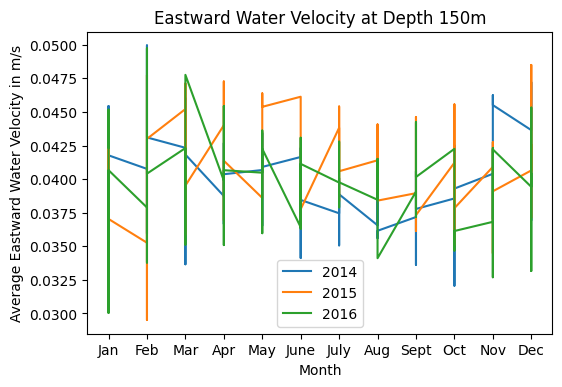

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, u150_2014)
plt.plot(xlabel, u150_2015)
plt.plot(xlabel, u150_2016)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average Eastward Water Velocity in m/s')
plt.title('Eastward Water Velocity at Depth 150m')
plt.show()

# **Generating Gif**

In [ ]:
video_args = {
  'dimensions': 287,
  'region': aoi,
  'framesPerSecond': 10,
  # 'crs': 'EPSG:3',
  'min': -500.0,
  'max': 500.0,
  'palette': ['blue', 'cyan', 'yellow', 'red'],
}

# gif_url = mean_spatial_2014_v0.getVideoThumbURL(video_args)
gif_url=gif1.getVideoThumbURL(video_args)

In [ ]:
gif_url

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/videoThumbnails/8b0c17117a08dceb8a150c72d82adff4-6024769a9af35efd21773a0a9c61ef9c:getPixels'

In [ ]:
js_snippet = """
col = col.map(function(img) {
  var doy = ee.Date(img.get('system:time_start')).getRelative('day', 'year');
  return img.set('doy', doy);
});

// Define a filter that identifies which images from the complete collection
// match the DOY from the distinct DOY collection.
var filter = ee.Filter.equals({leftField: 'doy', rightField: 'doy'});

// Define a join.
var join = ee.Join.saveAll('doy_matches');

// Apply the join and convert the resulting FeatureCollection to an
// ImageCollection.
var joinCol = ee.ImageCollection(join.apply(distinctDOY, col, filter));
"""

In [ ]:
lines = geemap.js_snippet_to_py(js_snippet, add_new_cell=False, import_ee=True, import_geemap=True, show_map=True)


In [ ]:
for line in lines:
    print(line.rstrip())

import ee
import geemap
Map = geemap.Map()

def func_axf(img):
  doy = ee.Date(img.get('system:time_start')).getRelative('day', 'year')
  return img.set('doy', doy)

col = col.map(func_axf)

# Define a filter that identifies which images from the complete collection
# match the DOY from the distinct DOY collection.
filter = ee.Filter.equals({'leftField': 'doy', 'rightField': 'doy'})

# Define a join.
join = ee.Join.saveAll('doy_matches')

# Apply the join and convert the resulting FeatureCollection to an
# ImageCollection.
joinCol = ee.ImageCollection(join.apply(distinctDOY, col, filter))
Map


In [ ]:
# import ee
# import geemap
Map = geemap.Map()

def func_jmg(img):
  doy = ee.Date(img.get('system:time_start')).getRelative('day', 'year')
  return img.set('doy', doy)

newcode = ic_v42014.map(func_jmg)

# Define a filter that identifies which images from the complete collection
# match the DOY from the distinct DOY collection.
filter = ee.Filter.equals({'leftField': 'doy', 'rightField': 'doy'})

# Define a join.
join = ee.Join.saveAll('doy_matches')

# Apply the join and convert the resulting FeatureCollection to an
# ImageCollection.
joinCol = ee.ImageCollection(join.apply(ic_v42014, ic_v42014, filter))
# Map

In [ ]:
js_snippet = """

// Define a mask to clip the NDVI data by.
var mask = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
  .filter(ee.Filter.eq('wld_rgn', 'Africa'));

var rgbVis = comp.map(function(img) {
  return img.visualize(visParams).clip(mask);
});

// Define GIF visualization parameters.
var gifParams = {
  'region': region,
  'dimensions': 600,
  'crs': 'EPSG:3857',
  'framesPerSecond': 10
};

// Print the GIF URL to the console.
print(rgbVis.getVideoThumbURL(gifParams));

// Render the GIF animation in the console.
print(ui.Thumbnail(rgbVis, gifParams));

"""


In [ ]:
lines = geemap.js_snippet_to_py(js_snippet, add_new_cell=False, import_ee=True, import_geemap=True, show_map=True)


In [ ]:
statement = """
var comp = joinCol.map(function(img) {
  var doyCol = ee.ImageCollection.fromImages(
    img.get('doy_matches')
  );
  return doyCol.reduce(ee.Reducer.median());
  
});

var waterVelocityVis = {
  min: -1000.0,
  max: 4000.0,
  bands: ['velocity_u_4', 'velocity_v_4', 'velocity_v_4'],
};
"""

In [ ]:
lines = geemap.js_snippet_to_py(statement, add_new_cell=False, import_ee=True, import_geemap=True, show_map=True)


In [ ]:
for line in lines:
    print(line.rstrip())

import ee
import geemap
Map = geemap.Map()

def func_ndt(img):
  doyCol = ee.ImageCollection.fromImages(
    img.get('doy_matches')
  )
  return doyCol.reduce(ee.Reducer.median())

comp = joinCol.map(func_ndt)

waterVelocityVis = {
  'min': -1000.0,
  'max': 4000.0,
  'bands': ['velocity_u_0', 'velocity_v_0', 'velocity_v_0'],
}
Map


In [ ]:
# import ee
# import geemap
Map = geemap.Map()

visParams = {
  'min': -1000.0,
  'max': 4000.0,
  'bands': ['velocity_u_4', 'velocity_v_4', 'velocity_v_4'],
}

# Define a mask to clip the NDVI data by.
mask = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017') \
  .filter(ee.Filter.eq('wld_rgn', 'Africa'))

def func_aff(img):
  return img.visualize(visParams).clip(mask)

def func_bpo(img):
  doyCol = ee.ImageCollection.fromImages(
    img.get('doy_matches')
  )
  return doyCol.reduce(ee.Reducer.mean())

comp = joinCol.map(func_bpo)
rgbVis = comp.map(func_aff)

# Define GIF visualization parameters.
gifParams = {
  'region': geometry,
  'dimensions': 600,
  'crs': 'EPSG:3857',
  'framesPerSecond': 10
}

# Print the GIF URL to the console.
print(rgbVis.getVideoThumbURL(gifParams))

# Render the GIF animation in the console.
print(ui.Thumbnail(rgbVis, gifParams))
Map

EEException: ignored